# US accidents





Descarga de datos

In [ ]:
!gdown https://drive.google.com/uc?id=1D2iQ2NBR9Wf_PWIkcmTkptaOCp8rA0mu --quiet

In [ ]:
!ls

sample_data  US_Accidents_Dec21_updated.csv


## Gaussian Naive

In [ ]:
import numpy
import pandas
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from IPython.display import display

print('\n\n[start]\n\n')

DF = pandas.read_csv('US_Accidents_Dec21_updated.csv')
DF.drop(DF.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,26,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]],axis=1,inplace=True);

DF['Astronomical_Twilight'] = DF['Astronomical_Twilight'].apply(lambda x : 0 if(x == 'Night') else 1);


DF = DF.dropna();

display(DF)

X = numpy.asarray(DF.iloc[:,1:])
Y = numpy.asarray(DF.Severity)

# Regla de Pareto
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size = 0.2);

Model = GaussianNB()

# Aprender betas de la regresion
Model.fit(X_train, Y_train)

Y_hat = Model.predict(X_test)

acc = numpy.sum(Y_hat == Y_test)/len(Y_hat)

print('\n\nPrecision = %0.4f \n[end]'%(acc))




[start]




,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Astronomical_Twilight
0,3,42.1,36.1,58.0,29.76,10.0,10.4,0.00,0
4,3,37.0,29.8,93.0,29.69,10.0,10.4,0.01,1
7,2,33.1,30.0,92.0,29.63,0.5,3.5,0.08,1
9,2,32.0,28.7,100.0,29.59,0.5,3.5,0.05,1
10,2,33.8,29.6,100.0,29.66,3.0,4.6,0.03,1
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,28.92,10.0,13.0,0.00,1
2845338,2,70.0,70.0,73.0,29.39,10.0,6.0,0.00,1
2845339,2,73.0,73.0,64.0,29.74,10.0,10.0,0.00,1
2845340,2,71.0,71.0,81.0,29.62,10.0,8.0,0.00,1




Precision = 0.9012 
[end]


In [ ]:
#Temperature = float(input('Temperature '));

x_prueba = numpy.array([37.0,29.8,93.0,29.69,10.0,10.4,0.01,1]);

print(Model.predict(x_prueba.reshape(1, -1)))


[2]


## KNN

In [ ]:
import numpy
import pandas
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from scipy import stats
from tqdm import tqdm

def kernelKNN(x, X, Y, nn):
	# distancia de cada muestra a la matriz del dataset
	d = LA.norm(x -X, axis=1);
	# cual es las etiquetas minimas
	idx = numpy.argsort(d);
	# calcular la moda para saber a quien pertenece
	y_hat , _ = stats.mode(Y[idx[0:nn]])
	return y_hat[0]

def KNN(X_train, X_test, Y_train, nn):
	X_train = X_train[numpy.random.choice(len(X_train), 100, replace=False)]
	Y_hat = [];
	for x in tqdm(X_test):
		# para cada muestra x_i del set de pruebas
		y_hat = kernelKNN(x, X_train, Y_train, nn);
		# guardas en un arreglo
		Y_hat.append(y_hat);
	return numpy.asarray(Y_hat)

print('\n\n[start]\n\n')

DF = pandas.read_csv('US_Accidents_Dec21_updated.csv')

DF.drop(DF.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,26,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]],axis=1,inplace=True);

DF['Astronomical_Twilight'] = DF['Astronomical_Twilight'].apply(lambda x : 0 if(x == 'Night') else 1);

DF = DF.dropna();

X = numpy.asarray(DF.iloc[:,1:])
Y = numpy.asarray(DF.Severity)

X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size = 0.2);

Y_hat = KNN(X_train, X_test, Y_train, nn = 3);

acc = numpy.sum(Y_hat == Y_test)/len(Y_hat)

print('\n\nPrecision = %0.4f \n[end]'%(acc))


[start]


100%|██████████| 442906/442906 [01:17<00:00, 5737.08it/s]



Precision = 0.9322 
[end]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas
import numpy

print('\n\n[start]\n\n')

DF = pandas.read_csv('US_Accidents_Dec21_updated.csv')

DF.drop(DF.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,26,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]],axis=1,inplace=True);

DF['Astronomical_Twilight'] = DF['Astronomical_Twilight'].apply(lambda x : 0 if(x == 'Night') else 1);

DF = DF.dropna();

X = numpy.asarray(DF.iloc[:,1:])
Y = numpy.asarray(DF.Severity)

pca = PCA( n_components =2)

pca.fit(X)

X_hat = pca. transform (X)

print (X. shape)
print('Despues de la reduccion')
print (X_hat. shape)



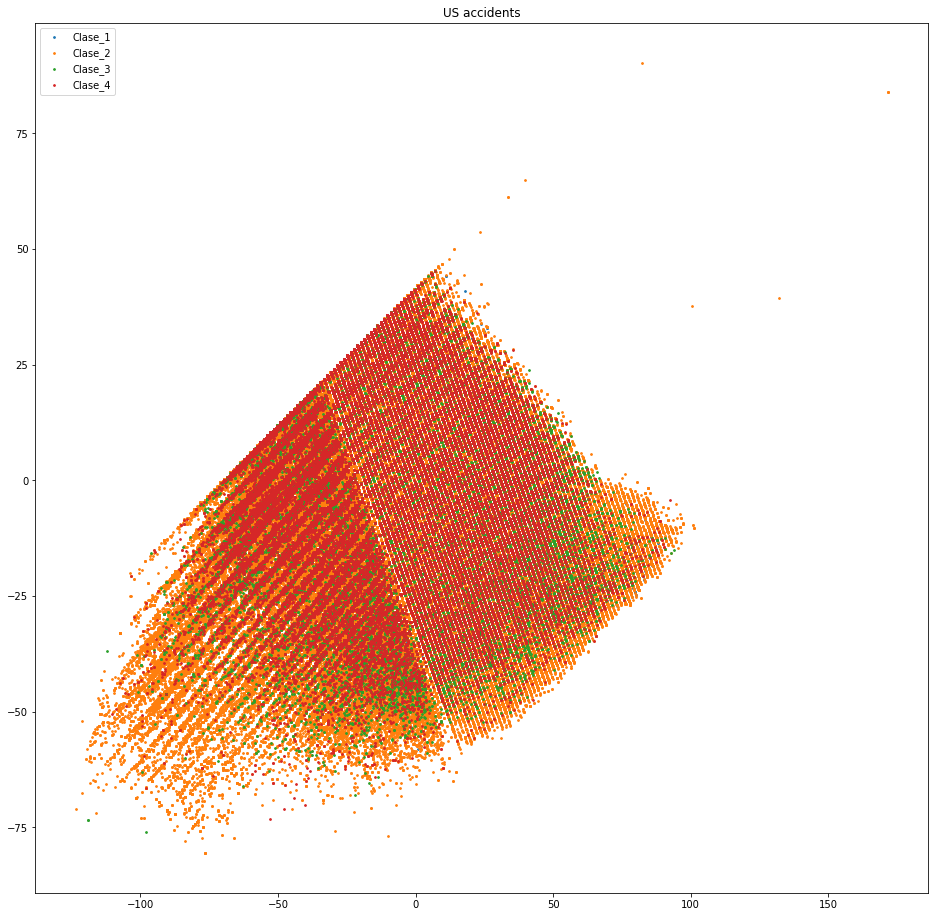

In [ ]:
plt.figure(figsize=(16, 16))

for k in range(1,5):
  plt.scatter (X_hat[Y == k,0], X_hat [Y == k,1],label ="Clase_" + str(k), s = 3);

plt.title("US accidents")
plt.legend (loc="upper left");

plt.show ();

In [ ]:
numpy.histogram(Y, bins = [1,2,3,4])

(array([  23596, 2063618,  127314]), array([1, 2, 3, 4]))

In [ ]:
numpy.unique(Y)

array([1, 2, 3, 4])